In [19]:
import tensorflow as tf
print (tf.__version__)

1.13.1


In [0]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.998):
            print("\n¡Alcanzó el 99% de precisión, de modo que se cancela el entrenamiento!")
            self.model.stop_training = True

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(training_images, trainig_labels),(test_images, test_labels)=mnist.load_data()

In [0]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images/ 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

In [0]:
callbacks = myCallback()

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total para

In [27]:
model.fit(training_images, trainig_labels, epochs=13, callbacks=[callbacks])

Epoch 1/13
60000/60000 [==============================] - 105s 2ms/sample - loss: 0.1231 - acc: 0.9619
Epoch 2/13
60000/60000 [==============================] - 104s 2ms/sample - loss: 0.0414 - acc: 0.9869
Epoch 3/13
60000/60000 [==============================] - 104s 2ms/sample - loss: 0.0292 - acc: 0.9901
Epoch 4/13
60000/60000 [==============================] - 105s 2ms/sample - loss: 0.0199 - acc: 0.9938
Epoch 5/13
60000/60000 [==============================] - 106s 2ms/sample - loss: 0.0157 - acc: 0.9949
Epoch 6/13
60000/60000 [==============================] - 106s 2ms/sample - loss: 0.0109 - acc: 0.9965
Epoch 7/13
60000/60000 [==============================] - 104s 2ms/sample - loss: 0.0112 - acc: 0.9962
Epoch 8/13
60000/60000 [==============================] - 104s 2ms/sample - loss: 0.0079 - acc: 0.9973
Epoch 9/13
60000/60000 [==============================] - 105s 2ms/sample - loss: 0.0083 - acc: 0.9974
Epoch 10/13
59968/60000 [============================>.] - ETA: 0s - loss

In [28]:
test_loss =model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 5s 492us/sample - loss: 0.0426 - acc: 0.9910


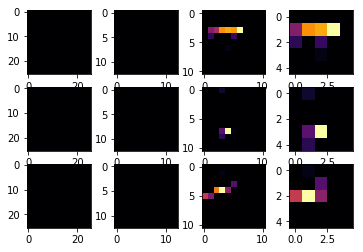

In [29]:
import matplotlib.pyplot as plt
f , axarr = plt.subplots(3,4)
FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model( inputs = model.input, outputs = layer_outputs )
for x in range (0,4):
    f1 = activation_model.predict( test_images[FIRST_IMAGE].reshape(1,28,28,1) )[x]
    axarr[0,x].imshow( f1[0, : , : ,CONVOLUTION_NUMBER], cmap='inferno' )
    axarr[0,x].grid(False)
    f2 = activation_model.predict( test_images[SECOND_IMAGE].reshape(1,28,28,1) )[x]
    axarr[1,x].imshow( f2[0, : , : ,CONVOLUTION_NUMBER], cmap='inferno' )
    axarr[1,x].grid(False)
    f3 = activation_model.predict( test_images[THIRD_IMAGE].reshape(1,28,28,1) )[x]
    axarr[2,x].imshow( f3[0, : , : ,CONVOLUTION_NUMBER], cmap='inferno' )
    axarr[2,x].grid(False)
